# <b>Finance Loan Approval Prediction</b>
This is a simple project to predict whether a loan will be approved or not based on various features. <br>
The dataset used in this project is the "Loan Prediction Problem" dataset from <a href=https://www.kaggle.com/datasets/krishnaraj30/finance-loan-approval-prediction-data/data>Kaggle</a>. <br>
The dataset contains information about loan applicants and their loan status (approved or not approved). <br>
The goal of this project is to build a machine learning model that can predict the loan status based on the applicant's features.

## Importing Libraries

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# importing the metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

## Defining Constants

In [328]:
TRAIN_INPUT_PATH = './data/train.csv'
TEST_INPUT_PATH = './data/test.csv'
TARGET = "Loan_Status"

# <b>DATA EXPLORATION</b>

firstly we will load the dataset and analyze it.

In [329]:
df = pd.read_csv(TRAIN_INPUT_PATH, sep=',', header=0, encoding='utf-8', index_col=0)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


As we can see the dataset contains 12 columns and 614 rows. <br>
The following columns are present in the dataset:
<ol>
<li><b>Loan_ID</b>: the Id associated to the loan</li>
<li><b>Gender</b>: the gender of the loan subject</li>
<li><b>Married</b>: whether the loan asker is married or not</li>
<li><b>Dependents</b>: the number of dependents of the loan subject </li>
<li><b>Education</b>: the level of education of the loan asker</li>
<li><b>Self_Employed</b>: if the loan asker is self employed or not </li>
<li><b>ApplicantIncome</b>: the income of the applicant </li>
<li><b>CoapplicantIncome</b>: the income of the cosigner of the loan</li>
<li><b>LoanAmount</b>: the amount of loan requested</li>
<li><b>Loan_Amount_Term</b>: the term of the loan in months</li>
<li><b>Credit_History</b>: whether the loan subject has a credit history or not</li>
<li><b>Property_Area</b>: the area of the property</li>
<li><b>Loan_Status</b>: the status of the loan (Y/N)</li>
</ol>

We are trying to predict the <b>Loan_Status</b> column which is the target variable. <br>

In [330]:
print('Feature present :', *df.columns.values, sep='\n\t- ')

Feature present :
	- Gender
	- Married
	- Dependents
	- Education
	- Self_Employed
	- ApplicantIncome
	- CoapplicantIncome
	- LoanAmount
	- Loan_Amount_Term
	- Credit_History
	- Property_Area
	- Loan_Status


Of the features given the following ones are categorical:
<ul>
<li><b>Gender</b>: assumes either Male or Female</li>
<li><b>Married</b>: assumes either Yes or No</li>
<li><b>Dependents</b>: assumes either 0, 1, 2 or 3+</li>
<li><b>Education</b>: assumes either Graduate or Not Graduate</li>
<li><b>Self_Employed</b>: assumes either Yes or No</li>
<li><b>Property_Area</b>: assumes either Urban, Semiurban or Rural</li>
<li><b>Loan_Status</b>: assumes either Y or N</li>
</ul>

In [331]:
print("Categorical features :")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'\t- {col} : ', end=' ')
        print( *df[col].unique(), sep=', ')

Categorical features :
	- Gender :  Male, Female, nan
	- Married :  No, Yes, nan
	- Dependents :  0, 1, 2, 3+, nan
	- Education :  Graduate, Not Graduate
	- Self_Employed :  No, Yes, nan
	- Property_Area :  Urban, Rural, Semiurban
	- Loan_Status :  Y, N


As we can see from the previous analysis the dataset contains some missing values. <br>
We can see which columns have missing values and how many missing values they have. <br>

In [332]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
CoapplicantIncome     0
ApplicantIncome       0
Property_Area         0
Loan_Status           0
dtype: int64

We can try plotting them to have a better understanding of the data. <br>

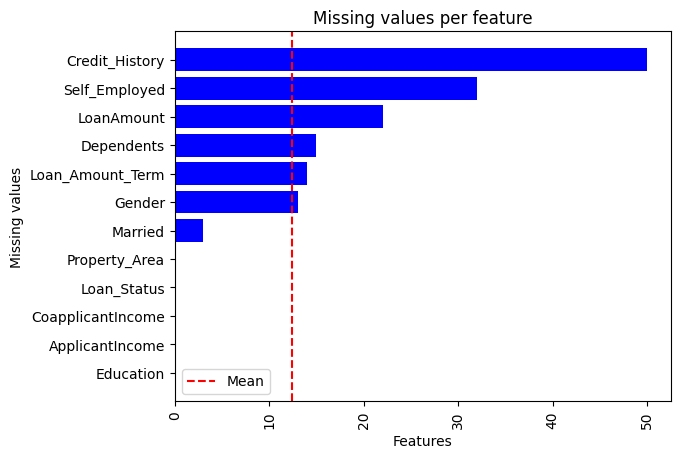

In [333]:
missing_values = df.isna().sum().sort_values(ascending=True)
plt.barh(missing_values.index, missing_values.values, color='blue')
plt.axvline(df.isna().sum().mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Missing values per feature')
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.xticks(rotation=90)
plt.show()
del missing_values

As we can see not all the columns have missing values. <br>
Furthermore, we can get the index of the rows that have missing values. <br>

In [334]:
print("Overall number of individual missing values  : ",  df.isna().sum().sum())
print("Overall number of rows with missing values : ", df.index[df.isna().any(axis=1)].unique().shape[0])

Overall number of individual missing values  :  149
Overall number of rows with missing values :  134


We will have to take into account the missing values before we are training our model. <br>

# <b>DATA PREPROCESSING</b>
In this section we will preprocess the data. <br>

## <b>Handling Missing Values</b>
We will handle the missing values in the dataset. <br>

The following policies has been adopted:
<ul>
<li><b>Gender</b>: we will drop the rows containing none gender</li>
<li><b>Married</b>: we will drop the rows containing none married status</li>
<li><b>Dependents</b>: we will set the number of dependents to 0</li>
<li><b>Self_Employed</b>: we will put self employed to -1</li>
<li><b>LoanAmount</b>: we will drop the rows containing lone amounts</li>
<li><b>Loan_Amount_Term</b>: we will set the loan amount term to 0</li>
<li><b>Credit_History</b>: we will set the credit history to -1</li>
</ul>

In [335]:
# Setting missing values to 0 or -1
df.loc[df['Dependents'].isna(), 'Dependents']= 0
df.loc[df['Self_Employed'].isna(), 'Self_Employed'] = -1
df.loc[df['Loan_Amount_Term'].isna(), 'Loan_Amount_Term'] = 0
df.loc[df['Credit_History'].isna(), 'Credit_History'] = -1 


# Dropping missing values
df.dropna(how='any', inplace=True)

Now there should be no missing values in the dataset. <br>

In [336]:
assert df.isna().sum().sum() == 0, "There are still missing values in the dataset"

## <b>Encoding Categorical Features</b>
We will encode the categorical features in the dataset. <br>
The following features will be encoded:
<ul>
<li><b>Gender</b>: Male will be encoded as -1, female as 1</li>
<li><b>Married</b>: Yes will be encoded as -1, No as 1</li>
<li><b>Dependents</b>: 0 will be encoded as 0, 1 as 1, 2 as 2 and 3+ as 3</li>
<li><b>Education</b>: Graduate will be encoded as 1, Not Graduate as -1</li>
<li><b>Self_Employed</b>: Yes will be encoded as -1, No as 1</li>
<li><b>Property_Area</b>: It will be one hot encoded</li>
</ul>

In [337]:
# Binary encoding for categorical features
df['Gender'] = df['Gender'].apply(lambda x:1 if str(x).lower()=='female' else -1)
df['Married'] = df['Married'].apply(lambda x:-1 if str(x).lower()=='yes' else 1)
df['Education'] = df['Education'].apply(lambda x:1 if str(x).lower()=='graduate' else -1)
df['Self_Employed'] = df['Self_Employed'].apply(lambda x:-1 if str(x).lower()=='yes' else 1)

# Encoding categorical features with numerical values
df['Dependents'] = df['Dependents'].apply(lambda x: int(x) if len(str(x)) < 2 else 4)

# One hot encoding for categorical features
df = pd.concat([df, pd.get_dummies(df['Property_Area'], prefix='Property_Area')], axis=1)
df.drop(columns=['Property_Area'], inplace=True)

In [338]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001003,-1,-1,1,1,1,4583,1508.0,128.0,360.0,1.0,N,True,False,False
LP001005,-1,-1,0,1,-1,3000,0.0,66.0,360.0,1.0,Y,False,False,True
LP001006,-1,-1,0,-1,1,2583,2358.0,120.0,360.0,1.0,Y,False,False,True
LP001008,-1,1,0,1,1,6000,0.0,141.0,360.0,1.0,Y,False,False,True
LP001011,-1,-1,2,1,-1,5417,4196.0,267.0,360.0,1.0,Y,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1,1,0,1,1,2900,0.0,71.0,360.0,1.0,Y,True,False,False
LP002979,-1,-1,4,1,1,4106,0.0,40.0,180.0,1.0,Y,True,False,False
LP002983,-1,-1,1,1,1,8072,240.0,253.0,360.0,1.0,Y,False,False,True


In [339]:
df.Loan_Status.value_counts()

Loan_Status
Y    401
N    176
Name: count, dtype: int64

Finally we can separate the features from the target variable. <br>

In [340]:
y = df['Loan_Status']
df.drop(columns=['Loan_Status'], inplace=True)

In [341]:
assert 'object' not in df.dtypes.values, "There are still categorical features in the dataset"

# <b>CORRELATION MATRIX</b>
We can plot the correlation matrix to see which features are correlated with each other. <br>

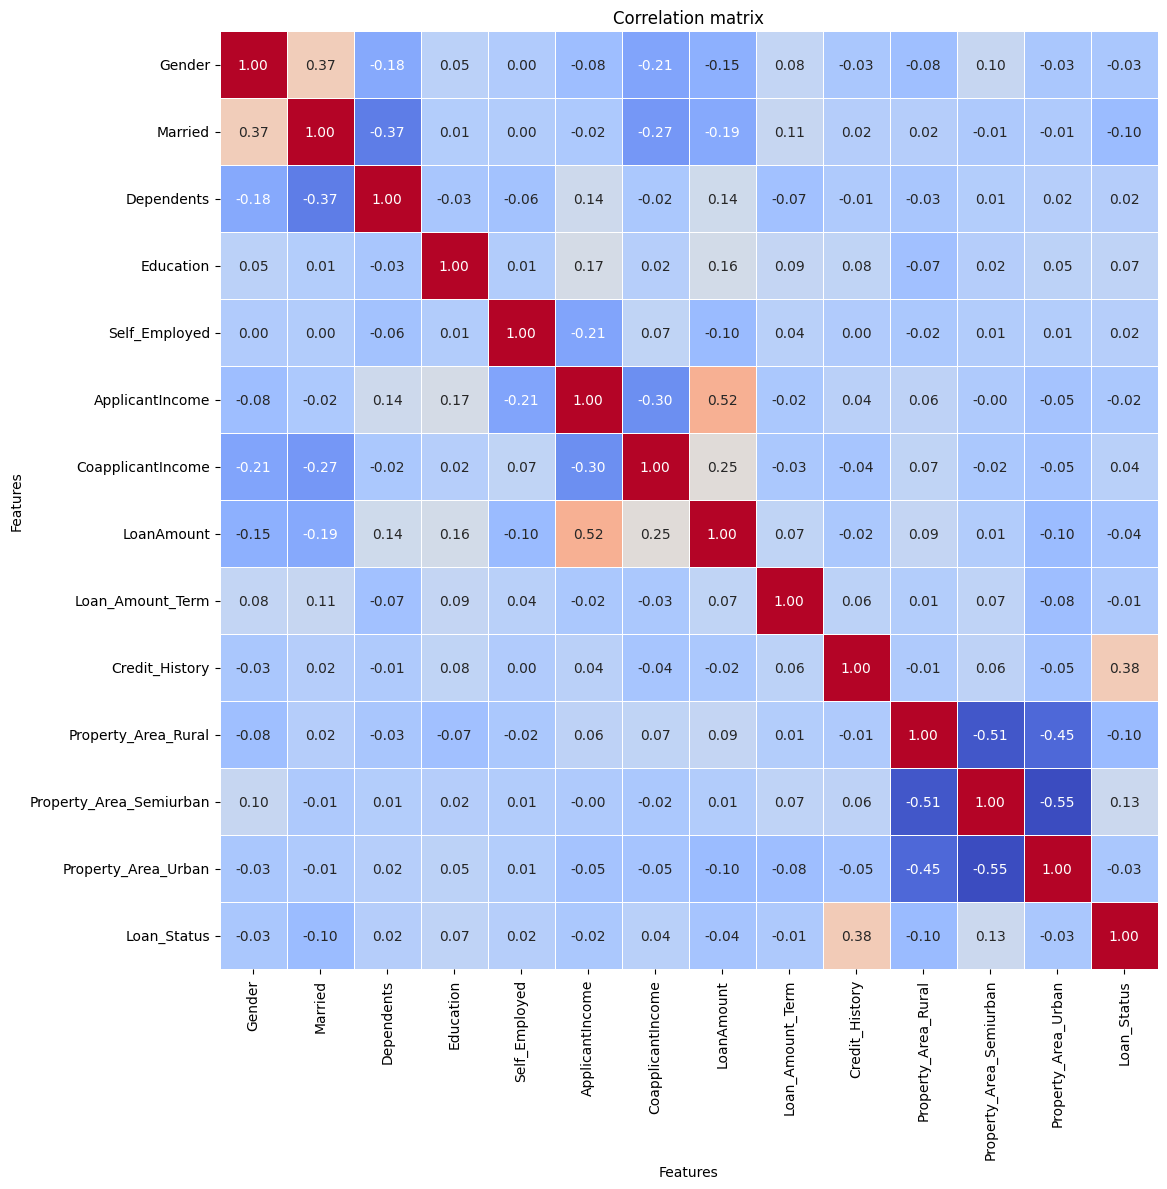

In [344]:
plt.figure(figsize=(12, 12))
sns.heatmap(pd.concat([df, y.apply(lambda x:1 if x=='Y' else 0)], axis=1).corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', cbar=False, square=True, linewidths=0.5)
plt.title('Correlation matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel('Features')
plt.ylabel('Features')
plt.grid(False)
plt.tight_layout()
plt.show()

As we can see, there is little to no correlation between the features. <br>
The only feature that has a medium positive correlation with the target variable is the <b>Credit_History</b> feature. <br>

# <b>MODEL TRAINING</b>
In this section we will train the model. <br>
We will use the following models:
<ul>
<li><b>Decision Tree</b>: is a supervised learning algorithm used for classification and regression tasks. It splits the data into subsets based on feature values, forming a tree-like structure to make predictions. It works by recursively splitting the dataset into branches based on the feature that provides the highest information gain or lowest Gini impurity. </li>
<li><b>Random Forest</b>: is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. It works by creating a collection of decision trees, each trained on a random subset of the data and features. The final prediction is made by aggregating the predictions from all the trees, typically using majority voting for classification tasks or averaging for regression tasks.</li>
<li><b>Logistic Regression</b>: is a statistical method used for binary classification problems. It models the relationship between a dependent binary variable and one or more independent variables by estimating the probability of the dependent variable being in a particular class. The logistic function (sigmoid function) is used to map predicted values to probabilities, allowing for interpretation as the likelihood of belonging to a specific class.</li>
<li><b>Support Vector Machine</b>: is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates data points of different classes in a high-dimensional space. The algorithm aims to maximize the margin between the closest data points (support vectors) of each class, ensuring better generalization to unseen data.</li>
<li><b>Gradient Boosting</b>: is an ensemble learning technique used for classification and regression tasks. It builds a model in a stage-wise fashion by combining weak learners (typically decision trees) to create a strong predictive model. Each new tree is trained to correct the errors made by the previous trees, and the final prediction is made by aggregating the predictions from all the trees.</li>
<li><b>K-Nearest Neighbors (KNN)</b>: is a simple and intuitive supervised learning algorithm used for classification and regression tasks. It works by finding the 'k' nearest data points (neighbors) to a given input based on a distance metric (e.g., Euclidean distance). The prediction is made by taking the majority vote (for classification) or averaging the values (for regression) of the nearest neighbors.</li>

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)

